# **Analisando as notas em geral**

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("ratings.csv")

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Renomeando a coluna
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [5]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Exibindo notas únicas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
# Contar ocorrência de valores
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
# Média das notas
notas['nota'].mean()

3.501556983616962

In [9]:
# Mediana
notas['nota'].median()

3.5

# **Pré visualização dos dados**

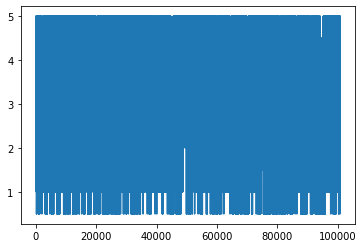

In [10]:
notas['nota'].plot()

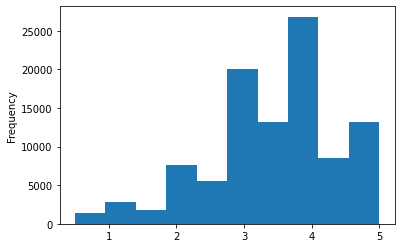

In [11]:
# Exibindo um histograma, que é mais indicado que o outro acima
notas['nota'].plot(kind='hist')

In [12]:
# Importando uma biblioteca gráfica
import seaborn as sns

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


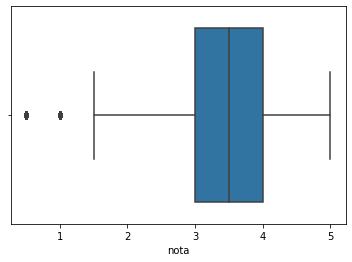

In [13]:
# Plot boxplot
print(sns.boxplot(notas['nota']))

AxesSubplot(0.125,0.125;0.775x0.755)


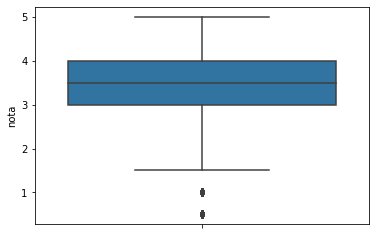

In [14]:
# Invertendo o eixo Y
print(sns.boxplot(y=notas['nota']))

# **Olhando os filmes**

In [15]:
filmes = pd.read_csv("movies.csv")

In [16]:
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [17]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [18]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# **Analisando algumas notas especificas por filme**

In [19]:
# Buscar as notas do filme de ID == 1
ts = notas.query("filmeId == 1").nota
notas.query("filmeId == 1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [20]:
# Menor nota para ToyStory
ts.min()

0.5

In [21]:
# Buscando a nota média do filme com ID == 1
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [22]:
notas.groupby("filmeId")

In [23]:
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [24]:
media_por_filme = notas.groupby("filmeId").mean().nota
media_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

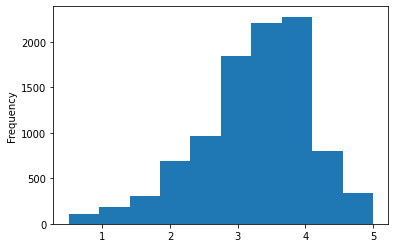

In [25]:
media_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


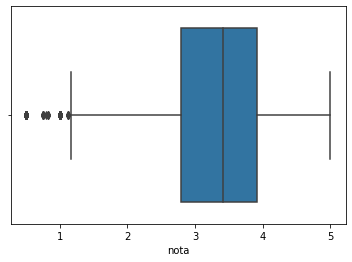

In [26]:
sns.boxplot(media_por_filme)

In [27]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [28]:
notas.query("nota == 5")

,usuarioId,filmeId,nota,momento
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


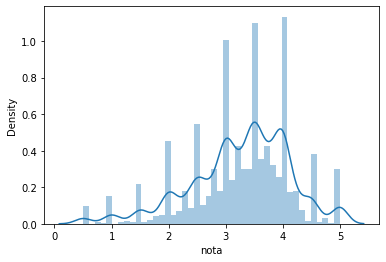

In [29]:
sns.distplot(media_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


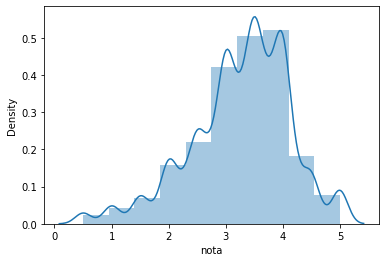

In [30]:
# Utilizando o bin para escolher um número de barras (bin)
sns.distplot(media_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias por filme')

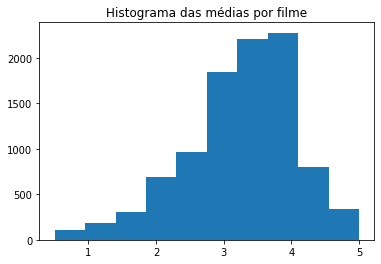

In [31]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Histograma das médias por filme")

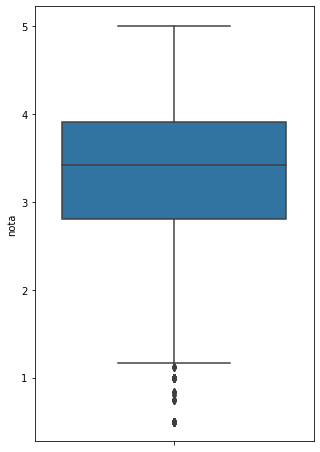

In [32]:
plt.figure(figsize = (5,8))
sns.boxplot(y=media_por_filme)

# **Tipos de variáveis TMDB**

In [33]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [34]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Quando trabalhar com um conjunto em que cada um dessas categorias recebe um nome, costumasse utilizar o termo ** variável categórica nominal **
# Exibindo dados categórico nominal
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [36]:
# Utilizando exemplo escolar de primeiro grau, segundo grau e terceiro grau, teriamos um tipo ** qualitativo porém ordinal **
# já que os graus representam uma classificação e há uma ordem a ser seguida para determinar a ordem


In [37]:
# Já orçamento representa uma variavel ** quantitativa contínua **, e por poder discretizar os valores com casas decimais(centavos de centavos),
# podemos classifica-las em ** contínua **

In [38]:
# Votos podem ser classificados como quantitativa por poder contar, mas há um determinado padrão que se segue entre os intervalo dos valores,
# Então classificamos de quantitativa intervalar, outro exemplo é pegar as notas do MovieLens, que eram compostas por 0.5, 1, 1.5, 2 etc....
# Há uma sequencia que se segue de 0.5 representando um espaçamento padrão e sendo assim, intervalar

# Trabalhando a Data visualization com TMDB

In [39]:
# Separando por colunas para comparação, criando uma série
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [40]:
# Criamos uma série porém ela parece mais um dataframe na qual a lingua é o index
# Vamos então de fato converter essa série para um DataFrame
tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [41]:
# Nosso índice continua sendo as siglas das linguas, então vamos criar um índice prórpio e separando melhor as colunas
tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [42]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


# *Plotando nosso DF com seaborn*

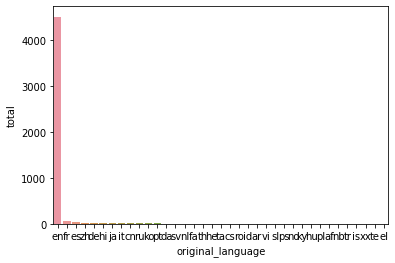

In [43]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

Até aqui, separamos a coluna original language, fizemos uma contagem,  criamos uma série, convertemos essa série em DF transformando o index em coluna, atribuimos esse resultado em uma variável, renomeamos os nomes das colunas e por fim fizemos uma plotagem

Vamos realizar a plotagem de uma outra forma mais fácil

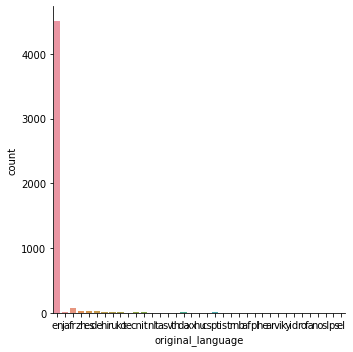

In [44]:
# Utilizando a nossa fonte de dados inicial
sns.catplot(x = "original_language", kind = "count", data = tmdb)

Tem uma diferença na ordenação do primeiro gráfico para o segundo gráfico

([<matplotlib.patches.Wedge at 0x7f03c1779250>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

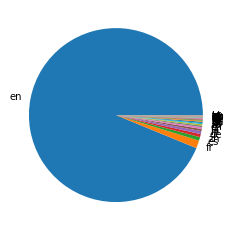

In [45]:
# Vamos utilizar agora o gráfico "pizza/torta" ou pie em inglês, o seaborn não oferece esse tipo de gráfico (todos odeiam gráfico de pizza ^^)
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua["original_language"])

In [46]:
# Separando total inglês das demais variáveis
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [47]:
dados = {"lingua": ["ingles", "outros"],
         "total":[total_de_ingles, total_do_resto]}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


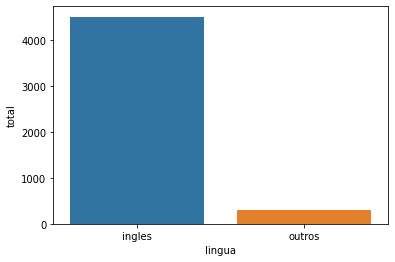

In [48]:
sns.barplot(data = dados, y = "total", x = "lingua")

([<matplotlib.patches.Wedge at 0x7f03c163dad0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

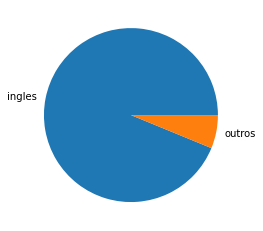

In [49]:
plt.pie(dados.total, labels = dados.lingua)

In [50]:
tmdb.query("original_language != 'en'").original_language.value_counts()

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [51]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles  = tmdb.query("original_language != 'en'")

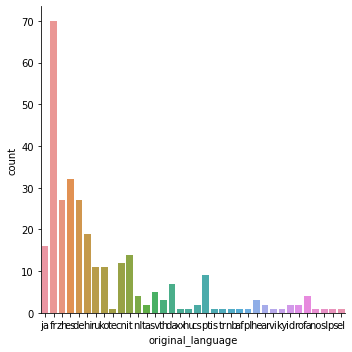

In [52]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

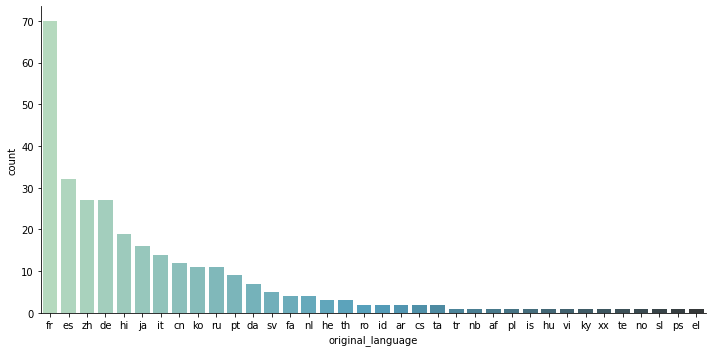

In [53]:
sns.catplot(x = "original_language", kind="count",
              data = filmes_sem_lingua_original_em_ingles,
              aspect = 2,
              palette="GnBu_d",
              order = total_por_lingua_de_outros_filmes.index)

In [54]:
# Nesta etapa será mostrada dois filmes específicos do arquivo movie.csv. Exibindo os 2 primeiros com filmes.head(2)
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [55]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [56]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [57]:
# Exibindo a média de cada um
print("Média do Toy Story %.2f " % notas_do_toy_story.nota.mean())
print("Média do Jumanji %.2f " % notas_do_jumanji.nota.mean())

Média do Toy Story 3.92 
Média do Jumanji 3.43 


Essa média não diz muito sobre as notas do filme, não sabemos quantas pessoas gostaram ou odiaram o filme, e o quão distantes essas opiniões podem ter.

In [58]:
# Buscando a mediana de cada um
print("Mediana do Toy Story %.2f " % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f " % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00 
Mediana do Jumanji 3.50 


O resultado continua o mesmo, não nos diz quase nada sobre, não temos ideia da proporção de como  está preenchido notas altas ou baixas, **ao tentar resumir tudo em um único número seja média ou mediana, perdemos um grande volume de dados.**

In [59]:
# Criando uma situação hipotetica onde há varias pessoas que deram notas 2.5 e 3.5
import numpy as np
filmes1 = np.append(np.array([2.5] * 10), np.array([3.5]* 10))
filmes1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [60]:
# Criando um outro array porem com 5.0 e 1.0
filmes2 = np.append(np.array([5] * 10), np.array([1] * 10))
filmes2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
# E então se imprimir a média e mediana de ambos?
print(f"Média {np.mean(filmes1)} e Mediana {np.median(filmes1)} do filme1")
print(f"Média {np.mean(filmes2)} e Mediana {np.median(filmes2)} do filme2")

Média 3.0 e Mediana 3.0 do filme1
Média 3.0 e Mediana 3.0 do filme2


As duas tendencias se repetem e novamente com dados disperços nos trazem o mesmo resultado, ainda não há como julgar se os dados são bons ou ruins ou qual seu comportamento

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


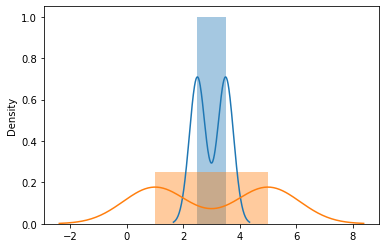

In [62]:
# Vamos visualizar os dados para uma ideia melhor
sns.distplot(filmes1)
sns.distplot(filmes2)

Desta forma conseguimos visualizar melhor sua distribuição, porém ainda não está tão boa

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

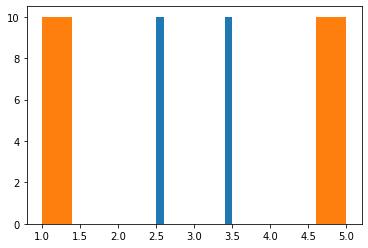

In [63]:
# Buscando outra forma de visualizar
plt.hist(filmes1)
plt.hist(filmes2)

Conseguimos visualizar melhor a distribuição de notas, apesar de não estar muito agradável

{'boxes': [<matplotlib.lines.Line2D at 0x7f03c16b2b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f03c160be50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f03c16b2190>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f03c169e890>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f03c4783d90>,
  <matplotlib.lines.Line2D at 0x7f03c14cc050>]}

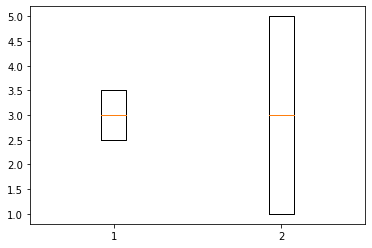

In [64]:
# utilizando matplotlib para plotar esse gráfico de uma outra forma com BOXPLOT
plt.boxplot([filmes1,filmes2])

Repare que, apesar das medianas estarem no mesmo ponto, as distribuições das notas no gráfico são muito diferentes para esses dois filmes, agora vamos verificar com nossos dados do filme de Toy Sotry e Jumanji

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f03c11b9a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f03c11bead0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f03c11c6b10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f03c11c65d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f03c12599d0>,
  <matplotlib.lines.Line2D at 0x7f03c11cbb10>]}

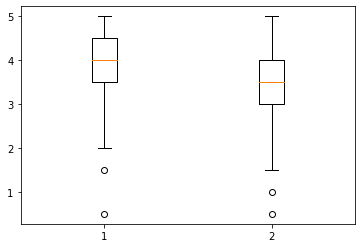

In [65]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

Mesmo não sendo a maneira mais ideal, conseguimos ver melhor nossa distribuição de notas. Agora podemos falar que não só a nota (média) de Toy Story é melhor, mas como sua distribuição de suas notas é superior, concentrando-se nos valores mais altos


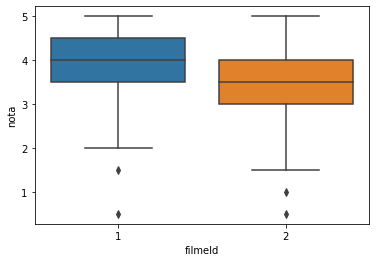

In [66]:
# Podemos explorar ainda mais nossos dados utilizando o seaborn, pois nos permite explorar os dados quando ainda não os separamos
# Por exemplo, a função boxplot(), como DATA, todo o conjunto NOTAS, parametrizando filmeId no eixo X e NOTA no eixo Y.
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

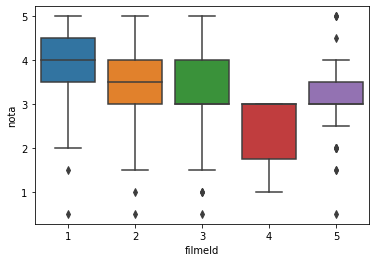

In [67]:
# Plotando mais filmes buscando pelos ids, de 1 até 5
sns.boxplot(x = "filmeId", y = "nota", data= notas.query("filmeId in (1,2,3,4,5)"))

Agora que nos aprofundamos ainda mais sobre as vantagens e desvantagens das visualizações, abordaremos outra questão: sabemos que existe uma maneira numérica de apontar as medidas centrais de um conjunto (mediana, média, e por aí vai), mas será que também existe uma maneira numérica de averiguar quão distantes os outros pontos estão dessas medidas?

Essa medida existe e é chamado de desvio padrão (ou standard deviation), um parâmetro que indica o quanto os dados do conjunto fogem de uma tendência central.

In [68]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


Dessa forma, temos não só a tendência central dos dados, mas também a tendência de dispersão. Podemos repetir o processo para nossos dados hipotéticos, filme1 e filme2, utilizando, por sua vez, np.std() (já que estamos trabalhando com arrays do Numpy):

In [69]:
print(np.mean(filmes1), np.mean(filmes2))
print(np.std(filmes1), np.std(filmes2))
print(np.median(filmes1), np.median(filmes2))

3.0 3.0
0.5 2.0
3.0 3.0
